In [70]:
import pandas as pd

In [71]:
df = pd.read_csv("brain_stroke.csv",index_col=0)

In [75]:
df[df['stroke']=='Yes'].head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
63,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
81,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,NaN,never smoked,Yes
141,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,Yes
257,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,Yes
264,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,Yes
288,Male,81.0,No,No,Yes,Private,Urban,186.21,29.0,formerly smoked,Yes
291,Male,74.0,Yes,Yes,Yes,Private,Rural,70.09,27.4,never smoked,Yes
320,Female,69.0,No,No,No,Private,Urban,94.39,22.8,never smoked,Yes
407,Female,59.0,No,No,Yes,Private,Rural,76.15,NaN,never smoked,Yes
426,Female,78.0,No,No,Yes,Private,Urban,58.57,24.2,never smoked,Yes


In [76]:
df[df['stroke']=='No'].head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,No,No,No,children,Rural,95.12,18.0,never smoked,No
1,Male,58.0,Yes,No,Yes,Private,Urban,87.96,39.2,never smoked,No
2,Female,8.0,No,No,No,Private,Urban,110.89,17.6,never smoked,No
3,Female,70.0,No,No,Yes,Private,Rural,69.04,35.9,formerly smoked,No
4,Male,14.0,No,No,No,Never_worked,Rural,161.28,19.1,never smoked,No
5,Female,47.0,No,No,Yes,Private,Urban,210.95,50.1,never smoked,No
6,Female,52.0,No,No,Yes,Private,Urban,77.59,17.7,formerly smoked,No
7,Female,75.0,No,Yes,Yes,Self-employed,Rural,243.53,27.0,never smoked,No
8,Female,32.0,No,No,Yes,Private,Rural,77.67,32.3,smokes,No
9,Female,74.0,Yes,No,Yes,Self-employed,Urban,205.84,54.6,never smoked,No


In [4]:
from imblearn.over_sampling import ADASYN

In [5]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
df.nunique()

gender                   2
age                   8856
hypertension             2
heart_disease            2
ever_married             2
work_type                5
Residence_type           2
avg_glucose_level    22404
bmi                   9979
smoking_status           3
stroke                   2
dtype: int64

In [7]:
df.isna().sum()

gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                  1462
smoking_status          0
stroke                  0
dtype: int64

In [8]:
df['smoking_status'].value_counts()

never smoked       34557
formerly smoked    11791
smokes              6923
Name: smoking_status, dtype: int64

In [9]:
df['bmi'].median()


28.4

In [10]:
df['bmi'].mean()

28.824857413639492

In [11]:
df['age'].min()

0.08

In [12]:
bin_edges = [0, 5, 10, 15, 20, 25, 30, 40, 50, 60, float('inf')]
bin_labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-40', '41-50', '51-60', '60+']

# Create bins using pd.cut()
df['Age_Bin'] = pd.cut(df['age'], bins=bin_edges, labels=bin_labels, right=False)

In [13]:
median_bmi_by_age_bin = df.groupby('Age_Bin')['bmi'].transform('median')

In [14]:
df['bmi'] = df['bmi'].fillna(median_bmi_by_age_bin)

In [15]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
Age_Bin              0
dtype: int64

In [16]:
df.drop('Age_Bin',axis=1,inplace=True)

In [17]:
df.nunique()

gender                   2
age                   8856
hypertension             2
heart_disease            2
ever_married             2
work_type                5
Residence_type           2
avg_glucose_level    22404
bmi                   9979
smoking_status           3
stroke                   2
dtype: int64

In [24]:
df.stroke.unique()

array(['No', 'Yes'], dtype=object)

In [27]:
object_col = df.select_dtypes(include=['object'])
object_col.drop('stroke',axis=1,inplace=True)
from scipy.stats import chi2_contingency



compare_cols= list(object_col.columns)

compare_cols

def chi2_test(df, column1, column2, significance_level=0.05):
    
    contingency_table = pd.crosstab(df[column1], df[column2])
    
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    
    h0_status = True if p_value <= significance_level else False

    return {'p_value': p_value, 'h0_rejected': h0_status}

chi2_results = {}


In [28]:
for col in compare_cols:
    chi2_results[col] = chi2_test(df, 'stroke', col)['h0_rejected']
    
chi2_results = pd.DataFrame(chi2_results, index=['h0_rejected']).T

display(chi2_results)


,h0_rejected
gender,True
hypertension,True
heart_disease,True
ever_married,True
work_type,True
Residence_type,True
smoking_status,True


In [29]:
numeric_columns = df.select_dtypes(include=['float64'])
import pandas as pd
from scipy.stats import f_oneway

def anova_test(df, target_column, numeric_columns, significance_level=0.05):
    # Create a dictionary to store ANOVA results
    anova_results = {}

    # Iterate through the numeric columns and perform ANOVA for each
    for column in numeric_columns:
        # Group data by the levels of the target column
        groups = [group[column] for _, group in df.groupby(target_column)]
        
        # Perform ANOVA test
        f_statistic, p_value = f_oneway(*groups)
        
        # Determine whether to reject the null hypothesis
        h0_status = p_value <= significance_level
        
        # Store results in the dictionary
        anova_results[column] = {'p_value': p_value, 'h0_rejected': h0_status}
    
    return anova_results

# Example usage:
# Assuming you have a DataFrame called 'data' and the target column is 'HeartDisease'

anova_results = anova_test(df, 'stroke', numeric_columns)

# Print the ANOVA results for each column
for column, result in anova_results.items():
    print(f"ANOVA Test for {column}:")
    print(f"P-value: {result['p_value']}")
    print(f"Null Hypothesis Rejected: {result['h0_rejected']}")


ANOVA Test for age:
P-value: 0.0
Null Hypothesis Rejected: True
ANOVA Test for avg_glucose_level:
P-value: 0.0
Null Hypothesis Rejected: True
ANOVA Test for bmi:
P-value: 2.5165285127631956e-51
Null Hypothesis Rejected: True


In [30]:
df['heart_disease'] = df['heart_disease'].replace({0:'No',1:'Yes'})

In [31]:
df['hypertension'] = df['hypertension'].replace({0:'No',1:'Yes'})

In [32]:
df['gender'].value_counts()

Female    33365
Male      19906
Name: gender, dtype: int64

In [33]:
df.shape

(53271, 11)

In [34]:
df['stroke'] = df['stroke'].replace({0:'No',1:'Yes'})

In [35]:
df= pd.get_dummies(df)

In [36]:
df['avg_glucose_level'].min()

55.0

In [37]:
df['avg_glucose_level'].max()

291.05

In [38]:
df.drop("stroke_No",axis=1,inplace=True)

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
train , test = train_test_split(df,test_size=0.15,stratify=df['stroke_Yes'])

In [41]:
train.shape

(45280, 22)

In [42]:
test.shape

(7991, 22)

In [43]:
import seaborn as sns

<Axes: xlabel='stroke_Yes', ylabel='Count'>

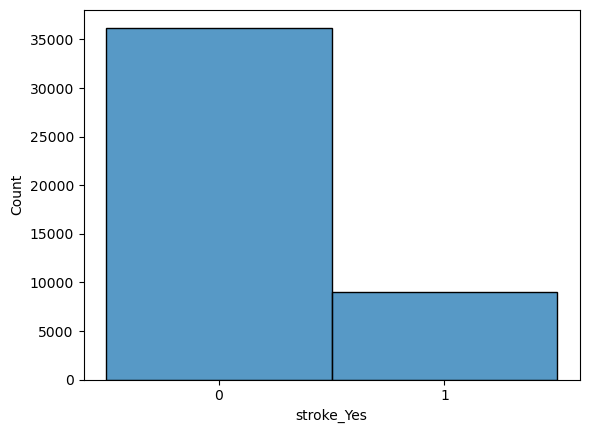

In [44]:
sns.histplot(train['stroke_Yes'].astype(str))

In [45]:
train['stroke_Yes'].value_counts(normalize=True)*100

0    80.0
1    20.0
Name: stroke_Yes, dtype: float64

In [46]:
x = train.drop('stroke_Yes',axis=1)
y = train['stroke_Yes']

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import numpy as np
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [48]:
# Logistic Regression

lr = LogisticRegression()
lr.get_params()

lr_params = {'C':np.linspace(0.01,5,10),'l1_ratio':np.linspace(0,1,10),'penalty':['l1','l2','elasticnet',None]}
kfold = StratifiedKFold(n_splits=3,shuffle=True,random_state=23)
gcv_lr = GridSearchCV(lr,param_grid=lr_params,cv=kfold,scoring='neg_log_loss',verbose=3,n_jobs=-1)

In [49]:
# Decision Tree

dtc = DecisionTreeClassifier()
dtc.get_params()

dtc_params = {'max_depth':[None,3,4,5,6,7,8],'min_samples_split':[2,5,10,20],'min_samples_leaf':[1,5,10,20]}
gcv_dtc = GridSearchCV(dtc,param_grid=dtc_params,cv=kfold,scoring='neg_log_loss',verbose=3,n_jobs=-1)

In [50]:
# Random Forest Classifier

rf = RandomForestClassifier()
rf.get_params()

rf_params = {'max_depth':[None,3,4],'max_features':[5,10,15,20],'n_estimators':[100,200,300,400]}
gcv_rf = GridSearchCV(rf,param_grid=rf_params,cv=kfold,scoring='neg_log_loss',verbose=3,n_jobs=-1)

In [53]:
# XGBoost
logloss = {}
xgb = XGBClassifier()
xgb.get_params()

xgb_params = {'learning_rate':np.linspace(0.001,0.5,5),'max_depth':[None,2,5],'n_estimators':[100,200]}
gcv_xgb = GridSearchCV(xgb,param_grid=xgb_params,cv=kfold,scoring='neg_log_loss',verbose=3,n_jobs=-1)

In [39]:
# Logistic regression fit

gcv_lr.fit(x,y)

print(gcv_lr.best_params_,gcv_lr.best_score_)
logloss['Logistic Regression'] = gcv_lr.best_score_

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
600 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
V

{'C': 5.0, 'l1_ratio': 0.0, 'penalty': 'l2'} -0.30289507925416426


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
# Decision Tree fit

gcv_dtc.fit(x,y)

print(gcv_dtc.best_params_,gcv_dtc.best_score_)
logloss['Decision Tree'] = gcv_dtc.best_score_

Fitting 3 folds for each of 112 candidates, totalling 336 fits
{'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 2} -0.320427900399739


In [41]:
# Random Forest fit

gcv_rf.fit(x,y)

print(gcv_rf.best_params_,gcv_rf.best_score_)
logloss['Random Forest'] = gcv_rf.best_score_

Fitting 3 folds for each of 48 candidates, totalling 144 fits
{'max_depth': None, 'max_features': 20, 'n_estimators': 300} -0.1750815795628116


In [54]:
# XGBoost fit

gcv_xgb.fit(x,y)

print(gcv_xgb.best_params_,gcv_xgb.best_score_)
logloss['XGBoost'] = gcv_xgb.best_score_

Fitting 3 folds for each of 30 candidates, totalling 90 fits
{'learning_rate': 0.5, 'max_depth': None, 'n_estimators': 200} -0.08880822178427068


In [55]:
from sklearn.metrics import accuracy_score,log_loss

In [56]:
from sklearn.metrics import confusion_matrix
test_x = test.drop('stroke_Yes',axis =1)
test_y = test['stroke_Yes']

In [46]:
best_gcv_lr = gcv_lr.best_estimator_
pred = best_gcv_lr.predict(test_x)
print(accuracy_score(test_y,pred))


0.8697284445000626


In [47]:
best_gcv_dtc = gcv_dtc.best_estimator_
pred = best_gcv_dtc.predict(test_x)
accuracy_score(test_y,pred)


0.876486046802653

In [48]:
from sklearn.metrics import confusion_matrix
best_gcv_RF = gcv_rf.best_estimator_
pred = best_gcv_RF.predict(test_x)

print(accuracy_score(test_y,pred))


0.9471905894130898


# Final model

In [57]:
best_gcv_xgb = gcv_xgb.best_estimator_
pred = best_gcv_xgb.predict(test_x)
accuracy_score(test_y,pred)


0.9770992366412213

In [50]:
from sklearn.ensemble import StackingClassifier 

In [51]:
lr = LogisticRegression(C= 1.6733333333333336, l1_ratio= 0.0, penalty= 'l2')
#svm = SVC(probability=True, random_state=23)
dtc = DecisionTreeClassifier(max_depth= 3, min_samples_leaf= 1, min_samples_split= 5,random_state=23)
models = [('LR', lr),('TREE',dtc)]
gbm = XGBClassifier(learning_rate= 0.12575, max_depth= 2, n_estimators= 100,random_state=23)
stack_xgb = StackingClassifier(estimators=models,
                           final_estimator=gbm,
                           passthrough=True)

In [52]:
stack_xgb.fit(x, y)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: 

StackingClassifier(estimators=[('LR',
                                LogisticRegression(C=1.6733333333333336,
                                                   l1_ratio=0.0)),
                               ('TREE',
                                DecisionTreeClassifier(max_depth=3,
                                                       min_samples_split=5,
                                                       random_state=23))],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 early_stopping_rounds=None,
                                                 enable_c...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.12575,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=2, max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=100, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None,
                                                 random_state=23, ...),
                   passthrough=True)

In [53]:
lr = LogisticRegression(C= 1.6733333333333336, l1_ratio= 0.0, penalty= 'l2')
#svm = SVC(probability=True, random_state=23)
dtc = DecisionTreeClassifier(max_depth= 3, min_samples_leaf= 1, min_samples_split= 5,random_state=23)
models = [('LR', lr),('TREE',dtc)]
#gbm = XGBClassifier(learning_rate= 0.2505, max_depth= None, n_estimators= 200,random_state=23)
rf = RandomForestClassifier(max_depth= 4, max_features= 20, n_estimators= 200)
stack_rf = StackingClassifier(estimators=models,
                           final_estimator=rf,
                           passthrough=True)

In [54]:
stack_rf.fit(x, y)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: 

StackingClassifier(estimators=[('LR',
                                LogisticRegression(C=1.6733333333333336,
                                                   l1_ratio=0.0)),
                               ('TREE',
                                DecisionTreeClassifier(max_depth=3,
                                                       min_samples_split=5,
                                                       random_state=23))],
                   final_estimator=RandomForestClassifier(max_depth=4,
                                                          max_features=20,
                                                          n_estimators=200),
                   passthrough=True)

In [55]:
pred = stack_rf.predict(test_x)
accuracy_score(test_y,pred)


0.8773620322863221

In [56]:
pred = stack_xgb.predict(test_x)
accuracy_score(test_y,pred)

0.8862470279063946

In [57]:
pred_proba = stack_rf.predict_proba(test_x)

In [58]:
log_loss(test_y,pred_proba[:,1])

0.2832779886679906

In [59]:
pred_proba_xgb = stack_xgb.predict_proba(test_x)

In [60]:
log_loss(test_y,pred_proba_xgb[:,1])

0.2647531751091056

In [61]:
import pickle

In [62]:
filename = 'brain_stroke_prediction_model.sav'
pickle.dump(best_gcv_xgb, open(filename, 'wb'))

In [58]:
import shap

In [59]:
explainer = shap.Explainer(best_gcv_xgb.predict, x)
shap_values = explainer(test_x)

Permutation explainer: 7992it [11:22, 11.59it/s]                                                                       


In [60]:
shap.initjs()

In [61]:
def sample_feature_importance(idx):
    if type == 'condensed':
        return shap.plots.force(shap_values[idx])
    elif type == 'waterfall':
        return shap.plots.waterfall(shap_values[idx])
    else:
        return "Return valid visual ('condensed', 'waterfall')"

In [62]:

sample_feature_importance(0)

"Return valid visual ('condensed', 'waterfall')"

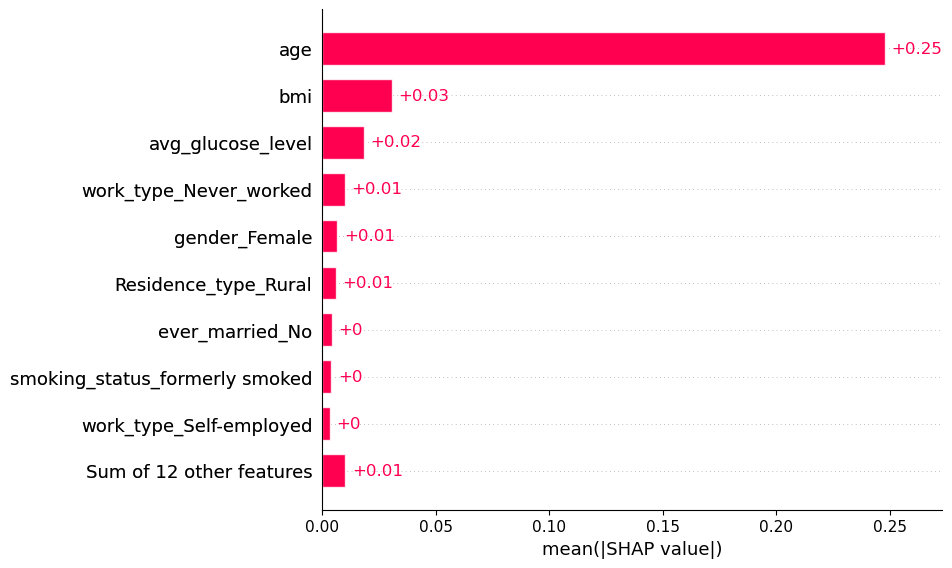

In [63]:

shap.plots.bar(shap_values)

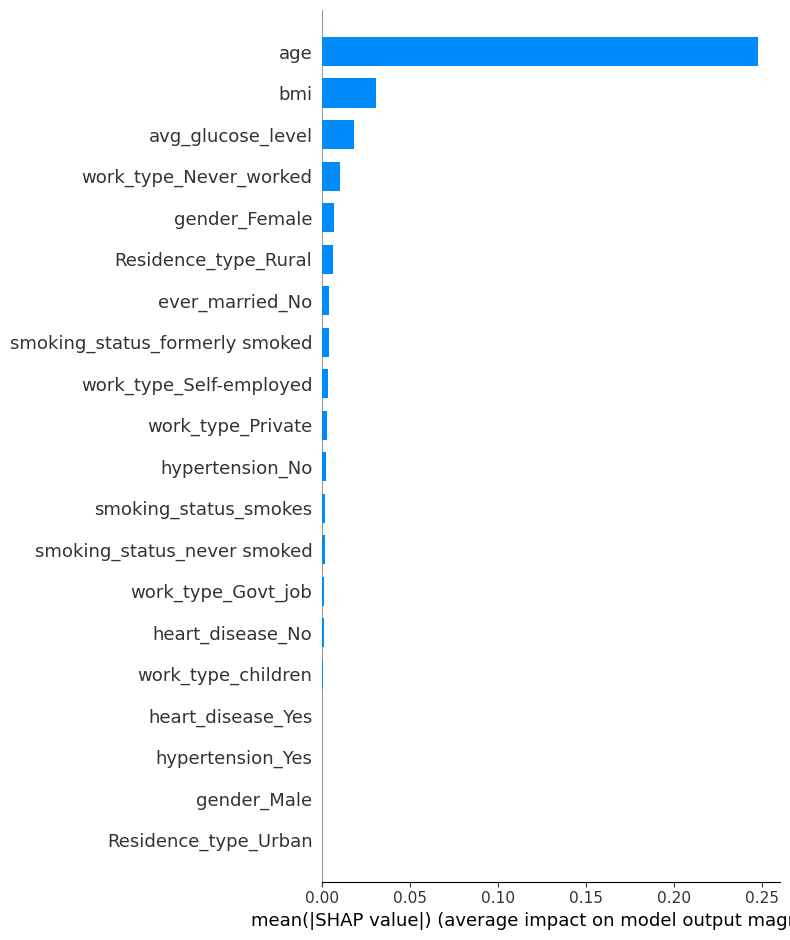

In [64]:
shap.summary_plot(shap_values.values, x, plot_type='bar')

In [65]:
from shapash.explainer.smart_explainer import SmartExplainer

In [66]:
xpl = SmartExplainer(model=best_gcv_xgb)

In [67]:
xpl.compile(
    x=x
)

In [68]:
xpl

In [69]:
app = xpl.run_app(title_story='Brain Dataset')

INFO:root:Your Shapash application run on http://dhpcap2:8050/
INFO:root:Use the method .kill() to down your app.
Exception in thread Thread-7 (<lambda>):
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "C:\ProgramData\anaconda3\lib\site-packages\urllib3\util\connection.py", line 95, in create_connection
    raise err
  File "C:\ProgramData\anaconda3\lib\site-packages\urllib3\util\connection.py", line 85, in create_connection
    sock.connect(sa)
OSError: [WinError 10049] The requested address is not valid in its context

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 703, in urlopen
    httplib_response = self._make_request(
  File "C:\ProgramData\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 398, in 